In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import warnings

In [3]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('images.csv')

In [5]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.groupby('label', as_index=False) \
    .agg({'pixel0' : 'count'}) \
    .rename(columns={'pixel0':'count'})

,label,count
0,0,4132
1,1,4684
2,2,4177
3,3,4351
4,4,4072
5,5,3795
6,6,4137
7,7,4401
8,8,4063
9,9,4188


In [7]:
X = data.drop(columns='label')
y = data['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
X_y_train = X_train.copy(deep=True)

In [10]:
X_y_train['y'] = y_train

In [11]:
def print_image(image_flat, ax=None):
    image = image_flat.reshape(28, 28).astype('uint8')

    if ax is None:
        plt.imshow(image)
    else:
        ax.axis('off')
        ax.imshow(image)

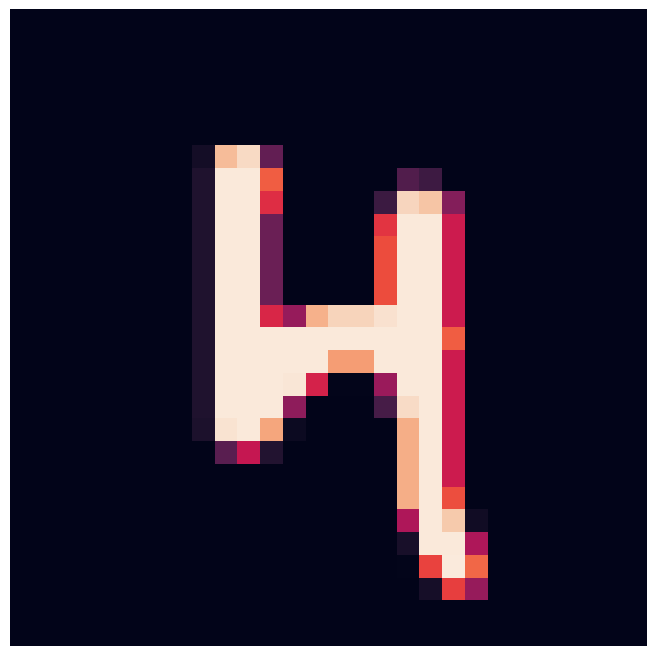

In [12]:
print_image(X_y_train.values[2, :-1], ax=plt)

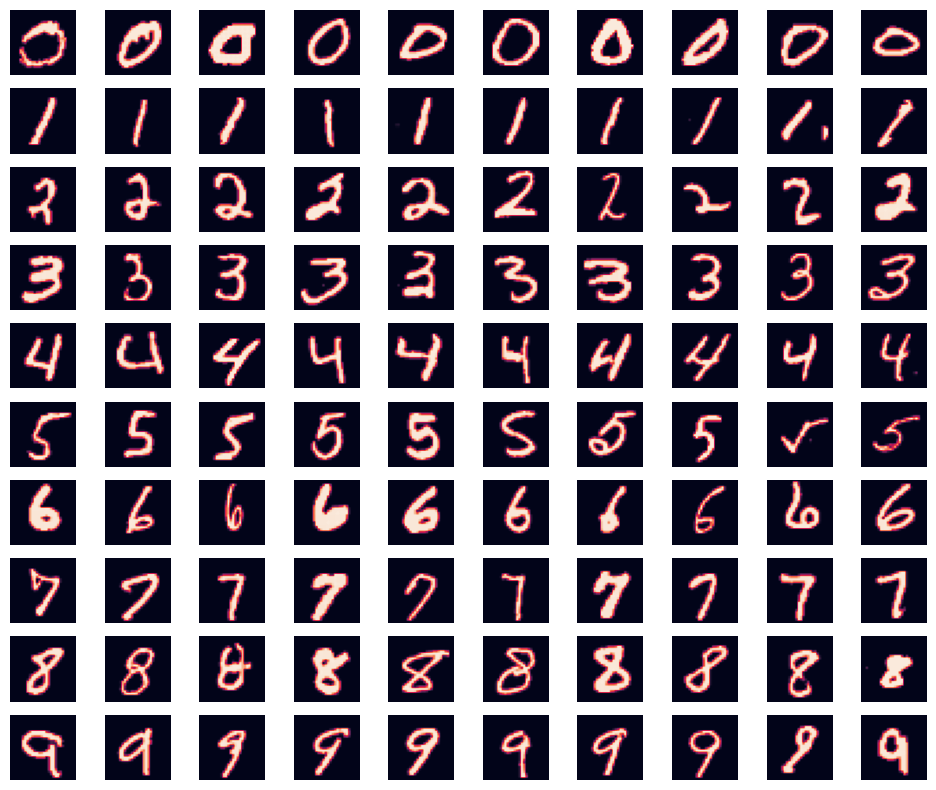

In [13]:
fig, axs = plt.subplots(10, 10, figsize=(12,10),
                       sharex=True, sharey=True)

group_n = 0
for _, group in X_y_train.groupby('y', as_index=False):
    random_numbers = group.sample(10).drop(columns='y')
    image_vects = [x.values for _, x in random_numbers.iterrows()]
    
    image_n = 0
    for image in image_vects:
        print_image(image, ax=axs[group_n][image_n])
        image_n += 1
        
    group_n += 1

In [14]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,...,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.0,33600.0,33600.0,33600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.227827,0.130268,0.064226,0.021429,0.021548,0.003571,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.578347,4.818621,3.437205,1.839529,2.118097,0.463160,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [15]:
description = X_train.describe()

<Axes: >

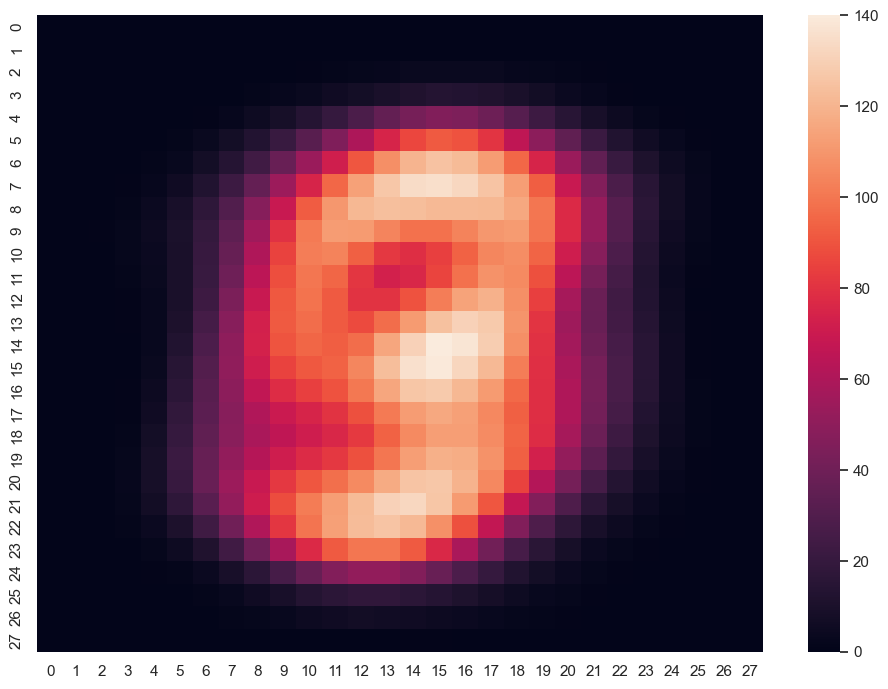

In [17]:
sns.heatmap(pd.DataFrame(description.loc['mean'].values.reshape(28, 28).round(2)))

<Axes: >

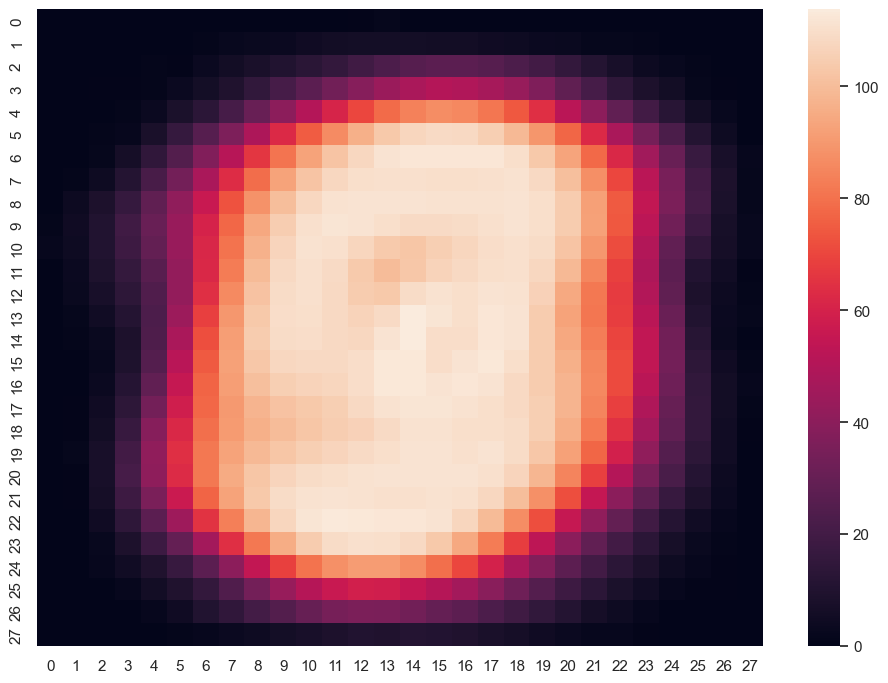

In [20]:
sns.heatmap(pd.DataFrame(description.loc['std'].values.reshape(28, 28).round(2)))

In [22]:
selector = VarianceThreshold(threshold=0)
selector.fit(X_train)

VarianceThreshold(threshold=0)

In [23]:
len(X_train.columns)

784

In [24]:
len(selector.transform(X_train)[0])

697

In [25]:
len(selector.get_feature_names_out())

697

In [26]:
X_train = X_train[selector.get_feature_names_out()]

In [27]:
X_train

,pixel12,pixel13,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
39317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Специальное переобучение

In [30]:
model_decision_tree_1 = DecisionTreeClassifier(min_samples_leaf=1, criterion='gini', random_state=1000)

In [38]:
%%time

model_decision_tree_1.fit(X_train, y_train)

CPU times: total: 6.08 s
Wall time: 8.75 s


DecisionTreeClassifier(random_state=1000)

In [39]:
# *.score оценивает по метрике 'accuracy'
model_decision_tree_1.score(X_train, y_train)

1.0

In [40]:
model_decision_tree_1.score(X_val, y_val)

0.840922619047619

## Увеличение кол-ва `min_samples_leaf = 3`

In [35]:
model_decision_tree_2 = DecisionTreeClassifier(min_samples_leaf=3, criterion='gini', random_state=1000)

In [37]:
%%time

model_decision_tree_2.fit(X_train, y_train)

CPU times: total: 5.55 s
Wall time: 7.62 s


DecisionTreeClassifier(min_samples_leaf=3, random_state=1000)

In [41]:
model_decision_tree_2.score(X_train, y_train)

0.9600818452380953

In [42]:
model_decision_tree_2.score(X_val, y_val)

0.844047619047619

## Увеличение кол-ва `min_samples_leaf = 5`

In [43]:
model_decision_tree_3 = DecisionTreeClassifier(min_samples_leaf=5, criterion='gini', random_state=1000)

In [44]:
%%time

model_decision_tree_3.fit(X_train, y_train)

CPU times: total: 5.81 s
Wall time: 7.24 s


DecisionTreeClassifier(min_samples_leaf=5, random_state=1000)

In [45]:
model_decision_tree_3.score(X_train, y_train)

0.9388392857142858

In [46]:
model_decision_tree_3.score(X_val, y_val)

0.8470238095238095

## Увеличение кол-ва `min_samples_leaf = 10`

In [47]:
model_decision_tree_4 = DecisionTreeClassifier(min_samples_leaf=10, criterion='gini', random_state=1000)

In [48]:
%%time

model_decision_tree_4.fit(X_train, y_train)

CPU times: total: 4.38 s
Wall time: 6.58 s


DecisionTreeClassifier(min_samples_leaf=10, random_state=1000)

In [49]:
model_decision_tree_4.score(X_train, y_train)

0.9066964285714286

In [50]:
model_decision_tree_4.score(X_val, y_val)

0.8415178571428571

### Допустим, что лучший результат для `DecisionTreeClassifier = 0.8470` на вал. выборке

# RandomForest

model_random_forest_100 = RandomForestClassifier(n_estimators=100,
                                                min_samples_leaf=1,
                                                max_features=int(len(list(X_train.columns)) ** (1/2)),
                                                criterion='gini')

In [52]:
%%time

model_random_forest_100.fit(X_train, y_train)

CPU times: total: 10.5 s
Wall time: 27.6 s


RandomForestClassifier(max_features=26)

In [53]:
model_random_forest_100.score(X_train, y_train)

1.0

In [54]:
model_random_forest_100.score(X_val, y_val)

0.9638392857142857

## RandomForest с `n_estimators=1000`

In [55]:
model_random_forest_1000 = RandomForestClassifier(n_estimators=1000,
                                                min_samples_leaf=5,
                                                max_features=int(len(list(X_train.columns)) ** (1/2)),
                                                criterion='gini')

In [56]:
%%time

model_random_forest_1000.fit(X_train, y_train)

CPU times: total: 2min 24s
Wall time: 3min 36s


RandomForestClassifier(max_features=26, min_samples_leaf=5, n_estimators=1000)

In [57]:
model_random_forest_1000.score(X_train, y_train)

0.990811011904762

In [58]:
model_random_forest_1000.score(X_val, y_val)

0.9561011904761905

In [59]:
y_pred = model_random_forest_100.predict(X_val)

In [61]:
precision_score(y_val, y_pred, average='micro')

0.9638392857142857

In [62]:
precision_score(y_val, y_pred, average='macro')

0.9635559057219666

In [69]:
X_err = X_val[y_pred != y_val]
y_err = y_val[y_pred != y_val]

In [70]:
X_y_y_pred_err = X_err.copy(deep=True)

In [71]:
X_y_y_pred_err['y'] = y_err
X_y_y_pred_err['y_pred'] = y_pred[y_pred != y_val]

In [74]:
X_y_y_pred_err \
    .groupby(['y', 'y_pred'], as_index=False) \
    .agg({'pixel200': 'count'}) \
    .sort_values('pixel200', ascending=False) \
    .head(15)

,y,y_pred,pixel200
23,3,5,11
15,2,4,10
33,4,9,9
63,9,4,9
51,7,9,9
26,3,8,9
21,3,2,9
18,2,8,9
62,9,3,8
65,9,7,7


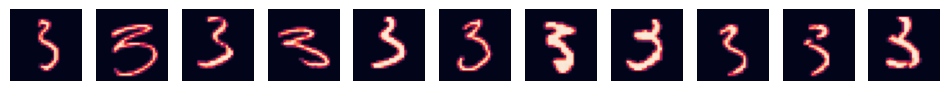

In [75]:
fig, axs = plt.subplots(1, 11, figsize=(12,10),
                       sharex=True, sharey=True)

df = X_y_y_pred_err[(X_y_y_pred_err['y'] == 3) & (X_y_y_pred_err['y_pred'] == 5)] \
    .drop(columns=['y_pred', 'y'])
    
image_n = 0
for ind, image_row in df.iterrows():
    inds_of_pixels = [int(x[5:]) for x in df.columns]
    image = np.array([(image_row['pixel' + str(i)] if i in inds_of_pixels else 0) for i in range(784)])
    
    print_image(image, ax=axs[image_n])
    image_n += 1

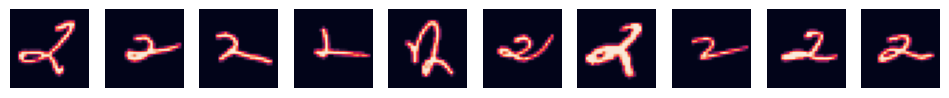

In [82]:
fig, axs = plt.subplots(1, 10, figsize=(12,10),
                       sharex=True, sharey=True)

df = X_y_y_pred_err[(X_y_y_pred_err['y'] == 2) & (X_y_y_pred_err['y_pred'] == 4)] \
    .drop(columns=['y_pred', 'y'])
    
image_n = 0
for ind, image_row in df.iterrows():
    inds_of_pixels = [int(x[5:]) for x in df.columns]
    image = np.array([(image_row['pixel' + str(i)] if i in inds_of_pixels else 0) for i in range(784)])
    
    print_image(image, ax=axs[image_n])
    image_n += 1

# Оценка качества модели

In [83]:
X_test = X_test[selector.get_feature_names_out()]

In [84]:
%%time

model_random_forest_100.score(X_test, y_test)

CPU times: total: 141 ms
Wall time: 290 ms


0.9625

In [85]:
%%time

boot_accuracies = []
boot_precisions = []
boot_recalls = []

X_y_test = X_test.copy(deep=True)
X_y_test['y'] = y_test

for i in range(1000):
    X_y_test_boot = X_y_test.sample(len(X_y_test), replace=True)
    X_test_boot = X_y_test_boot.drop(columns='y')
    y_test_boot = X_y_test_boot['y']
    
    y_pred = model_random_forest_100.predict(X_test_boot)
    
    boot_accuracies.append(accuracy_score(y_test_boot, y_pred))
    boot_precisions.append(precision_score(y_test_boot, y_pred, average='micro'))
    boot_recalls.append(recall_score(y_test_boot, y_pred, average='macro'))

CPU times: total: 3min 2s
Wall time: 5min 46s


<Axes: ylabel='Count'>

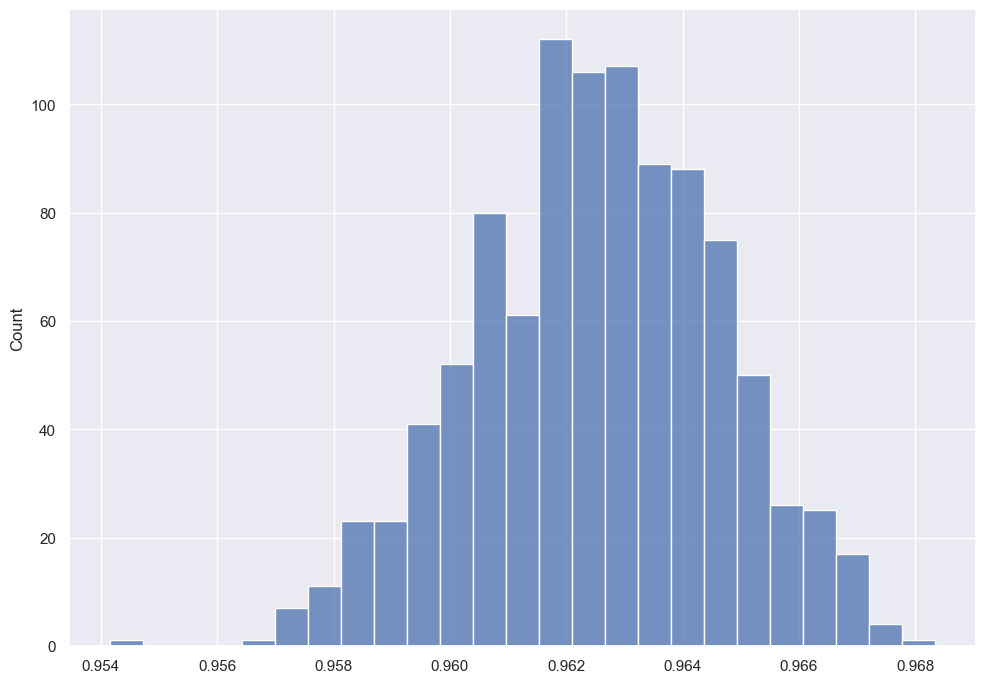

In [86]:
sns.histplot(boot_accuracies)

<Axes: ylabel='Count'>

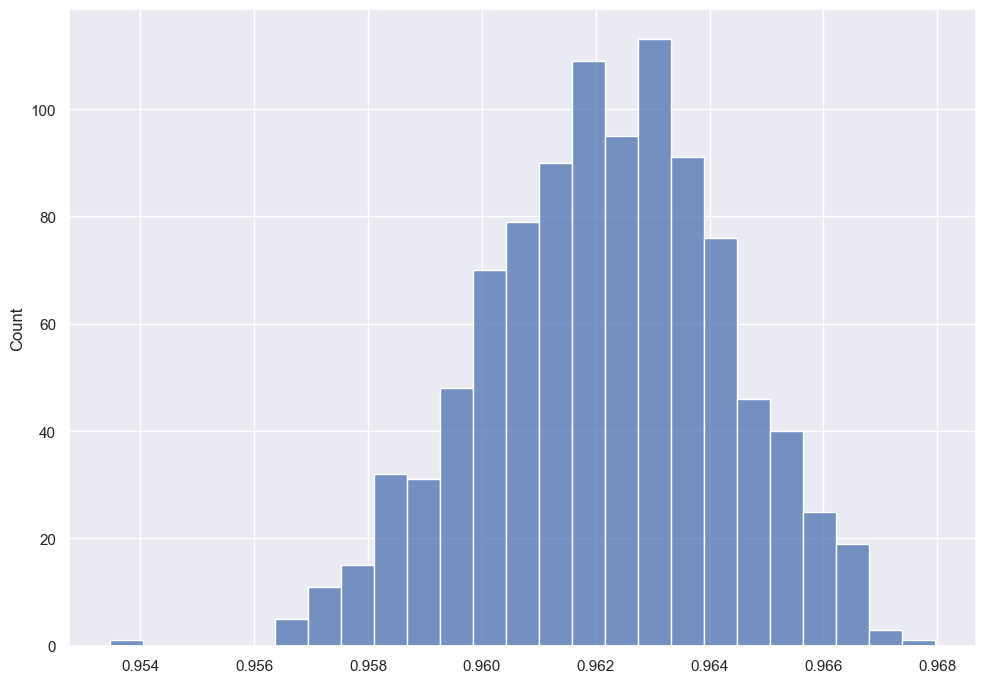

In [87]:
sns.histplot(boot_recalls)

<Axes: ylabel='Count'>

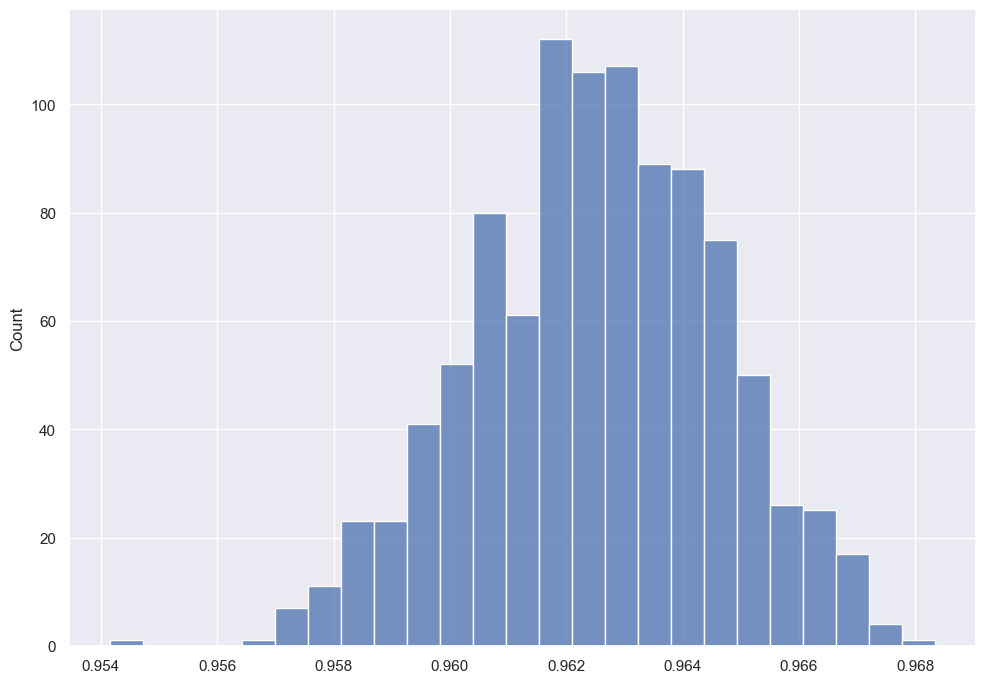

In [88]:
sns.histplot(boot_precisions)

In [89]:
boot_accuracies_sorted = list(sorted(boot_accuracies))
boot_accuracies_sorted = boot_accuracies_sorted[25:975]

print('Доверительный интервал для accuracy:', 
      '(' + str(round(boot_accuracies_sorted[0], 3)) + ', ' + str(round(boot_accuracies_sorted[-1], 3)) + ')')

Доверительный интервал для accuracy: (0.958, 0.966)


In [90]:
boot_precisions_sorted = list(sorted(boot_precisions))
boot_precisions_sorted = boot_precisions_sorted[25:975]

print('Доверительный интервал для precision:', 
      '(' + str(round(boot_precisions_sorted[0], 3)) + ', ' + str(round(boot_precisions_sorted[-1], 3)) + ')')

Доверительный интервал для precision: (0.958, 0.966)


In [91]:
boot_recalls_sorted = list(sorted(boot_recalls))
boot_recalls_sorted = boot_recalls_sorted[25:975]

print('Доверительный интервал для recall:', 
      '(' + str(round(boot_recalls_sorted[0], 3)) + ', ' + str(round(boot_recalls_sorted[-1], 3)) + ')')

Доверительный интервал для recall: (0.958, 0.966)


In [95]:
model_decision_tree_3.feature_importances_[model_decision_tree_3.feature_importances_ > 0]

array([1.51786581e-03, 1.90431193e-02, 6.99257337e-05, 1.24741870e-03,
       2.87542198e-04, 2.54114889e-04, 4.64115824e-03, 7.07831519e-05,
       1.90767237e-04, 3.39350697e-04, 8.37689913e-04, 5.12429338e-04,
       5.81709631e-04, 5.23644764e-05, 6.37975261e-04, 2.81086905e-04,
       1.90324732e-04, 3.90423375e-04, 1.77110629e-05, 2.06418103e-03,
       2.59019997e-03, 5.78228058e-04, 9.66824978e-04, 1.74135295e-04,
       4.83564949e-02, 9.04926155e-05, 5.24530423e-04, 2.42846430e-03,
       9.41422401e-04, 1.43498805e-05, 1.17708971e-04, 1.95186876e-04,
       7.47999490e-04, 5.89173832e-04, 6.73821028e-04, 6.59070922e-04,
       2.32352794e-03, 3.04958411e-03, 1.96568299e-03, 1.15160483e-02,
       2.06954259e-03, 6.89948831e-04, 1.46540948e-03, 4.47766976e-04,
       2.06749401e-03, 3.77698801e-03, 3.25181407e-04, 7.41243859e-04,
       5.35653830e-04, 1.81990749e-03, 8.12755217e-03, 5.17122443e-04,
       8.41607751e-04, 1.46547263e-03, 2.51260359e-03, 5.62716685e-04,
      

In [98]:
model_decision_tree_3.feature_names_in_[model_decision_tree_3.feature_importances_ > 0]

array(['pixel93', 'pixel96', 'pixel97', 'pixel99', 'pixel101', 'pixel102',
       'pixel104', 'pixel107', 'pixel120', 'pixel122', 'pixel123',
       'pixel126', 'pixel127', 'pixel128', 'pixel129', 'pixel130',
       'pixel131', 'pixel132', 'pixel149', 'pixel150', 'pixel151',
       'pixel152', 'pixel153', 'pixel154', 'pixel155', 'pixel156',
       'pixel157', 'pixel158', 'pixel159', 'pixel160', 'pixel161',
       'pixel174', 'pixel175', 'pixel176', 'pixel177', 'pixel179',
       'pixel180', 'pixel181', 'pixel182', 'pixel183', 'pixel184',
       'pixel185', 'pixel186', 'pixel187', 'pixel188', 'pixel191',
       'pixel201', 'pixel203', 'pixel204', 'pixel205', 'pixel206',
       'pixel207', 'pixel208', 'pixel209', 'pixel210', 'pixel211',
       'pixel212', 'pixel213', 'pixel214', 'pixel215', 'pixel216',
       'pixel217', 'pixel218', 'pixel219', 'pixel220', 'pixel231',
       'pixel232', 'pixel233', 'pixel234', 'pixel235', 'pixel236',
       'pixel237', 'pixel238', 'pixel239', 'pixel240',

<Axes: ylabel='Count'>

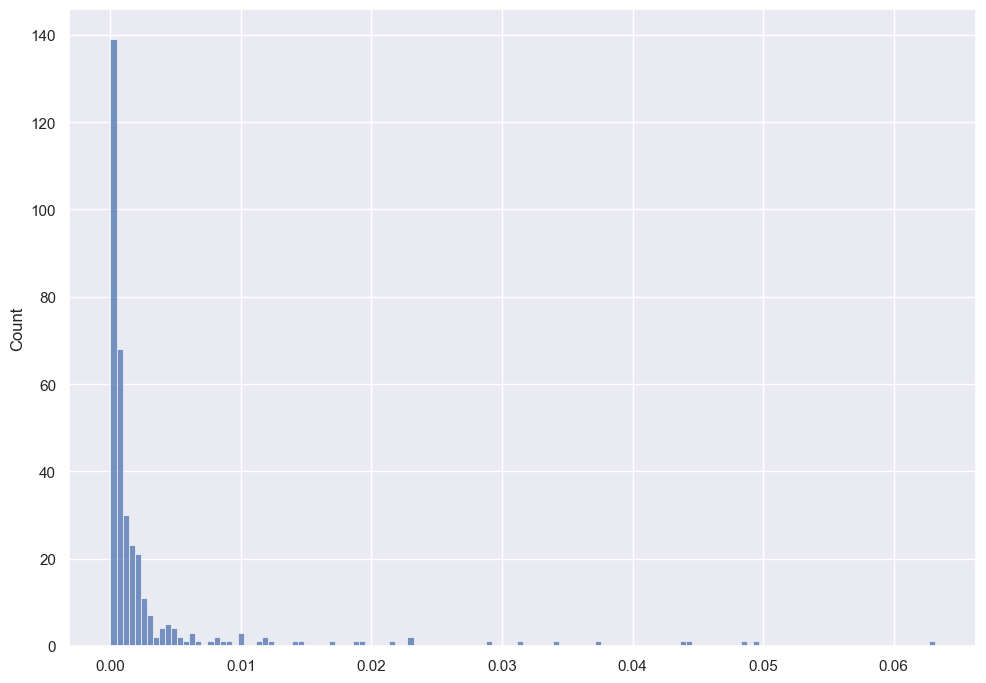

In [100]:
sns.histplot(model_decision_tree_3.feature_importances_[model_decision_tree_3.feature_importances_ > 0])

In [101]:
model_decision_tree_3.feature_names_in_[model_decision_tree_3.feature_importances_ > 0.01]

array(['pixel96', 'pixel155', 'pixel183', 'pixel239', 'pixel245',
       'pixel270', 'pixel290', 'pixel296', 'pixel322', 'pixel347',
       'pixel351', 'pixel375', 'pixel377', 'pixel409', 'pixel431',
       'pixel434', 'pixel455', 'pixel485', 'pixel488', 'pixel550',
       'pixel569', 'pixel657'], dtype=object)

In [102]:
important_feature_names = model_decision_tree_3.feature_names_in_[model_decision_tree_3.feature_importances_ > 0.01]

In [103]:
len(important_feature_names)

22

In [105]:
inds_of_important_pixels = [int(x[5:]) for x in model_decision_tree_3.feature_names_in_[model_decision_tree_3.feature_importances_ > 0.01]]

In [106]:
vect = np.array([(255 if i in inds_of_important_pixels else 0) for i in range(784)])

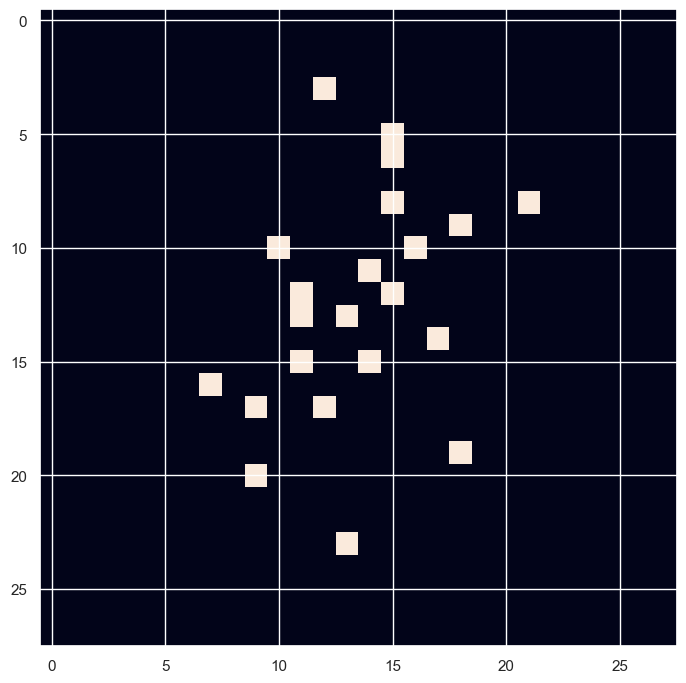

In [107]:
print_image(vect)